In [1]:
import duckdb
import json
import pandas as pd

/Users/adenbenson/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


## Running Instructions
This is assuming you have the entire dataset downloaded. In your working directory, the folder should be titled 'pads-parkinsons-disease-smartwatch-dataset-1.0.0'. Make sure you unzip the folder before running.

In [2]:
datapath='pads-parkinsons-disease-smartwatch-dataset-1.0.0'

# Load patients into dataframe

In [3]:
patients=[]

for i in range(1,10):
    filepath=f'{datapath}/patients/patient_00{i}.json'
    
    with open(filepath,'r') as f:
        patient_data=json.load(f)
        patients.append(patient_data)

for i in range(10,100):
    filepath=f'{datapath}/patients/patient_0{i}.json'
    
    with open(filepath,'r') as f:
        patient_data=json.load(f)
        patients.append(patient_data)

for i in range(100,470):
    filepath=f'{datapath}/patients/patient_{i}.json'
    
    with open(filepath,'r') as f:
        patient_data=json.load(f)
        patients.append(patient_data)
        
patients_df=pd.DataFrame(patients)

In [4]:
patients_df

,resource_type,id,study_id,condition,disease_comment,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,appearance_in_first_grade_kinship,effect_of_alcohol_on_tremor
0,patient,001,PADS,Healthy,-,56,56,173,78,male,right,True,True,Unknown
1,patient,002,PADS,Other Movement Disorders,Left-Sided resting tremor and hypokinesia with...,69,81,193,104,male,right,False,None,No effect
2,patient,003,PADS,Healthy,-,45,45,170,78,female,right,False,None,Unknown
3,patient,004,PADS,Parkinson's,IPS akinetic-rigid type,63,67,161,90,female,right,False,None,No effect
4,patient,005,PADS,Parkinson's,IPS tremordominant type,65,75,172,86,male,left,False,None,Unknown
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
464,patient,465,PADS,Parkinson's,IPS mixed type,62,65,175,80,male,right,True,False,No effect
465,patient,466,PADS,Healthy,-,84,84,172,74,female,right,True,True,No effect
466,patient,467,PADS,Parkinson's,"Essential Tremor, starting IPS tremordominant ...",55,57,190,100,male,right,False,None,Improvement
467,patient,468,PADS,Parkinson's,IPS mixed type,73,76,198,118,male,right,False,None,No effect


## Patients Data Imputation

In [5]:
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   resource_type                      469 non-null    object
 1   id                                 469 non-null    object
 2   study_id                           469 non-null    object
 3   condition                          469 non-null    object
 4   disease_comment                    469 non-null    object
 5   age_at_diagnosis                   469 non-null    int64 
 6   age                                469 non-null    int64 
 7   height                             469 non-null    int64 
 8   weight                             469 non-null    int64 
 9   gender                             469 non-null    object
 10  handedness                         469 non-null    object
 11  appearance_in_kinship              469 non-null    bool  
 12  appearan

In [6]:
# Check rows with null values for appearance_in_first_grade_kinship
patients_df[pd.isna(patients_df['appearance_in_first_grade_kinship'])]


,resource_type,id,study_id,condition,disease_comment,age_at_diagnosis,age,height,weight,gender,handedness,appearance_in_kinship,appearance_in_first_grade_kinship,effect_of_alcohol_on_tremor
1,patient,002,PADS,Other Movement Disorders,Left-Sided resting tremor and hypokinesia with...,69,81,193,104,male,right,False,None,No effect
2,patient,003,PADS,Healthy,-,45,45,170,78,female,right,False,None,Unknown
3,patient,004,PADS,Parkinson's,IPS akinetic-rigid type,63,67,161,90,female,right,False,None,No effect
4,patient,005,PADS,Parkinson's,IPS tremordominant type,65,75,172,86,male,left,False,None,Unknown
6,patient,007,PADS,Other Movement Disorders,Atypical IPS,73,74,181,94,male,right,False,None,No effect
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
462,patient,463,PADS,Healthy,-,65,65,180,90,male,right,False,None,No effect
463,patient,464,PADS,Parkinson's,IPS tremordominant type,36,51,184,68,male,right,False,None,No effect
466,patient,467,PADS,Parkinson's,"Essential Tremor, starting IPS tremordominant ...",55,57,190,100,male,right,False,None,Improvement
467,patient,468,PADS,Parkinson's,IPS mixed type,73,76,198,118,male,right,False,None,No effect


<Axes: >

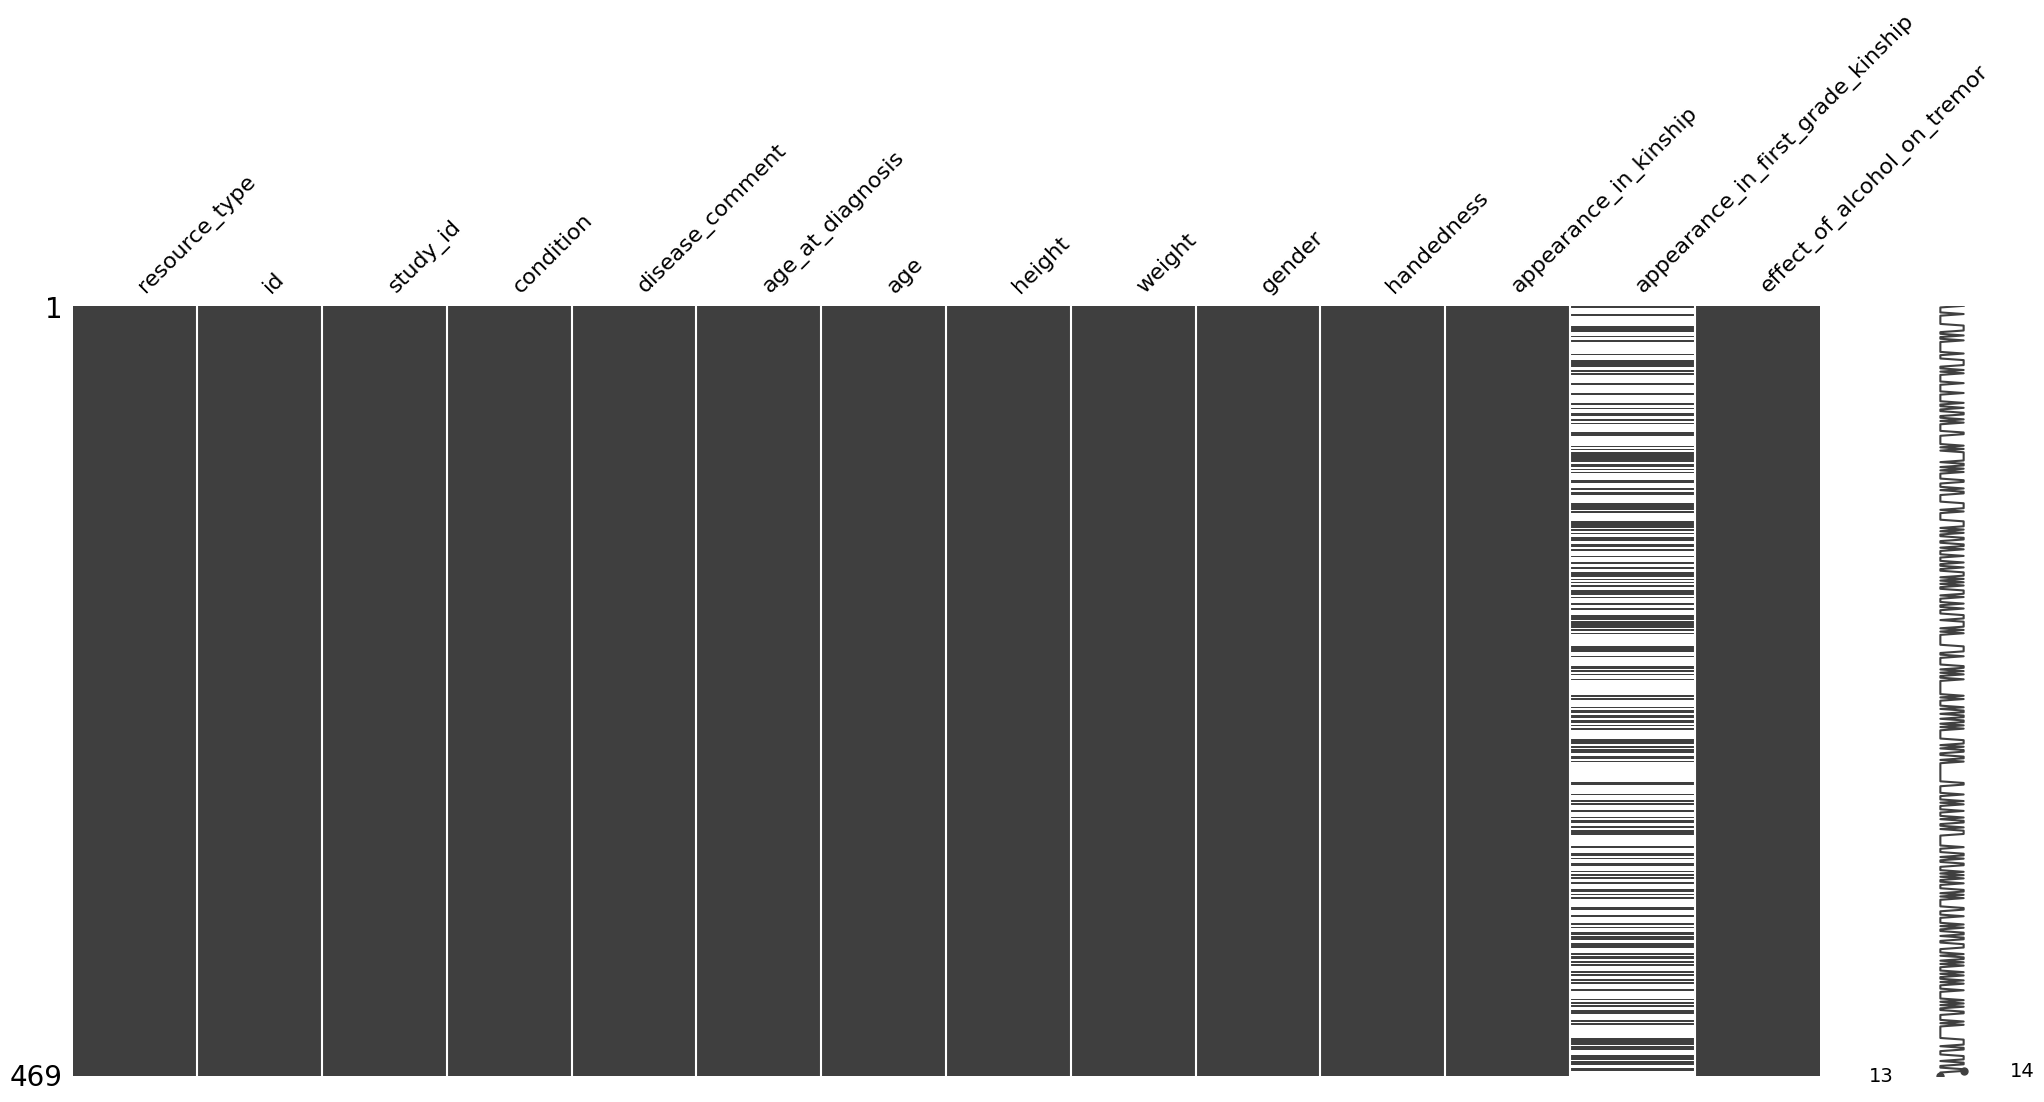

In [7]:
import missingno as msno
msno.matrix(patients_df)

In [8]:
# Convert boolean to integer (0 or 1)
patients_df['appearance_in_first_grade_kinship_int'] = patients_df['appearance_in_first_grade_kinship'].astype('float')

# Correlation
corr = patients_df.corr(numeric_only=True)

# Show correlation with appearance_in_first_grade_kinship_int (only column with null values)
print(corr['appearance_in_first_grade_kinship_int'].sort_values(ascending=False))

patients_df.drop(columns=['appearance_in_first_grade_kinship_int'], inplace=True)


appearance_in_first_grade_kinship_int    1.000000
appearance_in_kinship                    0.753397
height                                   0.205251
weight                                   0.125334
age_at_diagnosis                         0.111832
age                                      0.056887
Name: appearance_in_first_grade_kinship_int, dtype: float64


In [9]:
from sklearn.impute import KNNImputer
import pandas as pd

# Only use columns with stronger correlation
knn_data = patients_df[['appearance_in_first_grade_kinship', 'appearance_in_kinship', 'height']].copy()
knn_data = knn_data.astype('float')

# KNN imputation, 5 nearest neighbors
imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(knn_data)

# Insert imputed values into Dataframe as boolean values
patients_df['appearance_in_first_grade_kinship'] = imputed[:, 0].round().astype(bool)


In [10]:
# Check to ensure imputation was successful
patients_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 0 to 468
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   resource_type                      469 non-null    object
 1   id                                 469 non-null    object
 2   study_id                           469 non-null    object
 3   condition                          469 non-null    object
 4   disease_comment                    469 non-null    object
 5   age_at_diagnosis                   469 non-null    int64 
 6   age                                469 non-null    int64 
 7   height                             469 non-null    int64 
 8   weight                             469 non-null    int64 
 9   gender                             469 non-null    object
 10  handedness                         469 non-null    object
 11  appearance_in_kinship              469 non-null    bool  
 12  appearan

## Load in Questionnaire Data

In [11]:
questionnaires=[]

for i in range(1,10):
    filepath=f'{datapath}/questionnaire/questionnaire_response_00{i}.json'
    
    with open(filepath,'r') as f:
        questionnaire_data=json.load(f)
        questionnaires.append(questionnaire_data)

for i in range(10,100):
    filepath=f'{datapath}/questionnaire/questionnaire_response_0{i}.json'
    
    with open(filepath,'r') as f:
        questionnaire_data=json.load(f)
        questionnaires.append(questionnaire_data)

for i in range(100,470):
    filepath=f'{datapath}/questionnaire/questionnaire_response_{i}.json'
    
    with open(filepath,'r') as f:
        questionnaire_data=json.load(f)
        questionnaires.append(questionnaire_data)
        
questionnaire_df=pd.DataFrame(questionnaires)

In [12]:
questionnaire_df

,resource_type,subject_id,study_id,id,questionnaire_name,item
0,questionnaire_response,001,PADS,Non-motor Symptoms,NMS,"[{'link_id': '01', 'text': 'Dribbling of saliv..."
1,questionnaire_response,002,PADS,Non-motor Symptoms,NMS,"[{'link_id': '01', 'text': 'Dribbling of saliv..."
2,questionnaire_response,003,PADS,Non-motor Symptoms,NMS,"[{'link_id': '01', 'text': 'Dribbling of saliv..."
3,questionnaire_response,004,PADS,Non-motor Symptoms,NMS,"[{'link_id': '01', 'text': 'Dribbling of saliv..."
4,questionnaire_response,005,PADS,Non-motor Symptoms,NMS,"[{'link_id': '01', 'text': 'Dribbling of saliv..."
...,...,...,...,...,...,...
464,questionnaire_response,465,PADS,Non-motor Symptoms,NMS,"[{'link_id': '01', 'text': 'Dribbling of saliv..."
465,questionnaire_response,466,PADS,Non-motor Symptoms,NMS,"[{'link_id': '01', 'text': 'Dribbling of saliv..."
466,questionnaire_response,467,PADS,Non-motor Symptoms,NMS,"[{'link_id': '01', 'text': 'Dribbling of saliv..."
467,questionnaire_response,468,PADS,Non-motor Symptoms,NMS,"[{'link_id': '01', 'text': 'Dribbling of saliv..."


In [13]:
import pandas as pd

# Function to convert item list into a list of (link_id, answer) dicts
def expand_items_to_rows(row):
    """
    Takes a row of the dataframe and returns a list of dicts,
    each representing one (subject_id, link_id, answer) entry.
    """
    items = row['item']
    subject_id = row['subject_id']
    study_id = row.get('study_id')
    resource_type = row.get('resource_type')
    questionnaire_name = row.get('questionnaire_name')

    return [
        {
            'subject_id': subject_id,
            'study_id': study_id,
            'resource_type': resource_type,
            'questionnaire_name': questionnaire_name,
            'linkid': entry['link_id'],
            'value': entry['answer']
        }
        for entry in items if 'link_id' in entry and 'answer' in entry
    ]

# Apply to each row to get a list of dicts
expanded_rows = questionnaire_df.apply(expand_items_to_rows, axis=1)

# Flatten the list of lists into a single list of rows
flat_data = [item for sublist in expanded_rows for item in sublist]

# Convert to DataFrame
clean_questionnaire_df = pd.DataFrame(flat_data)

# Optional: sort or set index
clean_questionnaire_df.sort_values(['subject_id', 'linkid'], inplace=True)

# Show result
clean_questionnaire_df.head()

,subject_id,study_id,resource_type,questionnaire_name,linkid,value
0,001,PADS,questionnaire_response,NMS,01,False
1,001,PADS,questionnaire_response,NMS,02,False
2,001,PADS,questionnaire_response,NMS,03,False
3,001,PADS,questionnaire_response,NMS,04,False
4,001,PADS,questionnaire_response,NMS,05,False


In [14]:
clean_questionnaire_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14070 entries, 0 to 14069
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   subject_id          14070 non-null  object
 1   study_id            14070 non-null  object
 2   resource_type       14070 non-null  object
 3   questionnaire_name  14070 non-null  object
 4   linkid              14070 non-null  object
 5   value               14070 non-null  bool  
dtypes: bool(1), object(5)
memory usage: 563.5+ KB


There are no null values. Imputation is not necessary. Patients data and questionnaire data can be joined on subject_id to have complete patient information. Both will be uploaded as tables.

# Create Link ID specification dataframe

In [15]:
item_list = questionnaire_df['item'].iloc[0]

# Extract unique link_id + text pairs
linkid_df = pd.DataFrame([
    {'link_id': item['link_id'], 'text': item['text']}
    for item in item_list if 'link_id' in item and 'text' in item
]).drop_duplicates()

linkid_df.reset_index(drop=True)

linkid_df.head()

,link_id,text
0,01,Dribbling of saliva during the daytime
1,02,Loss or change in your ability to taste or smell
2,03,Difficulty swallowing food or drink or problem...
3,04,Vomiting or feelings of sickness (nausea)
4,05,Constipation (less than 3 bowel movements a we...


# Load movement observations into df

In [16]:
observations=[]

for i in range(1,10):
    filepath=f'{datapath}/movement/observation_00{i}.json'
    
    with open(filepath,'r') as f:
        observation_data=json.load(f)
        
        # Create a dictionary of high level fields from json
        common = {
            "subject_id": observation_data["subject_id"],
            "study_id": observation_data["study_id"],
            "device_id": observation_data["device_id"],
            "assessment_id": observation_data["id"],
            "sampling_rate": observation_data["sampling_rate"],
            "data_type": observation_data["data_type"],
            "bits": observation_data["bits"]
        }

        # Dig into nested fields in json, first in "session", then in "records"
        for session_field in observation_data["session"]:
            for record_field in session_field["records"]:
                
                row={
                    **common, # Add common for this specific row
                    "record_name": session_field["record_name"],
                    "session_rows": session_field["rows"],
                    "device_location": record_field["device_location"],
                    "file_name": record_field["file_name"],
                    "channels": record_field["channels"], # Display channels and units lists
                    "units": record_field["units"] # They'll be unpacked in the movement df
                }
                observations.append(row)

for i in range(10,100):
    filepath=f'{datapath}/movement/observation_0{i}.json'
    
    with open(filepath,'r') as f:
        observation_data=json.load(f)
        
        # Create a dictionary of high level fields from json
        common = {
            "subject_id": observation_data["subject_id"],
            "study_id": observation_data["study_id"],
            "device_id": observation_data["device_id"],
            "assessment_id": observation_data["id"],
            "sampling_rate": observation_data["sampling_rate"],
            "data_type": observation_data["data_type"],
            "bits": observation_data["bits"]
        }

        # Dig into nested fields in json, first in "session", then in "records"
        for session_field in observation_data["session"]:
            for record_field in session_field["records"]:
                
                row={
                    **common, # Add common for this specific row
                    "record_name": session_field["record_name"],
                    "session_rows": session_field["rows"],
                    "device_location": record_field["device_location"],
                    "file_name": record_field["file_name"],
                    "channels": record_field["channels"], # Display channels and units lists
                    "units": record_field["units"] # They'll be unpacked in the movement df
                }
                observations.append(row)

for i in range(100,470):
    filepath=f'{datapath}/movement/observation_{i}.json'
    
    with open(filepath,'r') as f:
        observation_data=json.load(f)
        
        # Create a dictionary of high level fields from json
        common = {
            "subject_id": observation_data["subject_id"],
            "study_id": observation_data["study_id"],
            "device_id": observation_data["device_id"],
            "assessment_id": observation_data["id"],
            "sampling_rate": observation_data["sampling_rate"],
            "data_type": observation_data["data_type"],
            "bits": observation_data["bits"]
        }

        # Dig into nested fields in json, first in "session", then in "records"
        for session_field in observation_data["session"]:
            for record_field in session_field["records"]:
                
                row={
                    **common, # Add common for this specific row
                    "record_name": session_field["record_name"],
                    "session_rows": session_field["rows"],
                    "device_location": record_field["device_location"],
                    "file_name": record_field["file_name"],
                    "channels": record_field["channels"], # Display channels and units lists
                    "units": record_field["units"] # They'll be unpacked in the movement df
                }
                observations.append(row)



        
observation_df=pd.DataFrame(observations)

# Add an "observation_id" index to match with our timeseries data
observation_df["observation_id"] = observation_df.index

In [17]:
observation_df

,subject_id,study_id,device_id,assessment_id,sampling_rate,data_type,bits,record_name,session_rows,device_location,file_name,channels,units,observation_id
0,001,PADS,Apple Watch Series 4,Neurological Assessment,100,float,32,Relaxed,2048,LeftWrist,timeseries/001_Relaxed_LeftWrist.txt,"[Time, Accelerometer_X, Accelerometer_Y, Accel...","[s, g, g, g, rad/s, rad/s, rad/s]",0
1,001,PADS,Apple Watch Series 4,Neurological Assessment,100,float,32,Relaxed,2048,RightWrist,timeseries/001_Relaxed_RightWrist.txt,"[Time, Accelerometer_X, Accelerometer_Y, Accel...","[s, g, g, g, rad/s, rad/s, rad/s]",1
2,001,PADS,Apple Watch Series 4,Neurological Assessment,100,float,32,RelaxedTask,2048,LeftWrist,timeseries/001_RelaxedTask_LeftWrist.txt,"[Time, Accelerometer_X, Accelerometer_Y, Accel...","[s, g, g, g, rad/s, rad/s, rad/s]",2
3,001,PADS,Apple Watch Series 4,Neurological Assessment,100,float,32,RelaxedTask,2048,RightWrist,timeseries/001_RelaxedTask_RightWrist.txt,"[Time, Accelerometer_X, Accelerometer_Y, Accel...","[s, g, g, g, rad/s, rad/s, rad/s]",3
4,001,PADS,Apple Watch Series 4,Neurological Assessment,100,float,32,StretchHold,1024,LeftWrist,timeseries/001_StretchHold_LeftWrist.txt,"[Time, Accelerometer_X, Accelerometer_Y, Accel...","[s, g, g, g, rad/s, rad/s, rad/s]",4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10313,469,PADS,Apple Watch Series 4,Neurological Assessment,100,float,32,TouchIndex,1024,RightWrist,timeseries/469_TouchIndex_RightWrist.txt,"[Time, Accelerometer_X, Accelerometer_Y, Accel...","[s, g, g, g, rad/s, rad/s, rad/s]",10313
10314,469,PADS,Apple Watch Series 4,Neurological Assessment,100,float,32,TouchNose,1024,LeftWrist,timeseries/469_TouchNose_LeftWrist.txt,"[Time, Accelerometer_X, Accelerometer_Y, Accel...","[s, g, g, g, rad/s, rad/s, rad/s]",10314
10315,469,PADS,Apple Watch Series 4,Neurological Assessment,100,float,32,TouchNose,1024,RightWrist,timeseries/469_TouchNose_RightWrist.txt,"[Time, Accelerometer_X, Accelerometer_Y, Accel...","[s, g, g, g, rad/s, rad/s, rad/s]",10315
10316,469,PADS,Apple Watch Series 4,Neurological Assessment,100,float,32,Entrainment,2048,LeftWrist,timeseries/469_Entrainment_LeftWrist.txt,"[Time, Accelerometer_X, Accelerometer_Y, Accel...","[s, g, g, g, rad/s, rad/s, rad/s]",10316


# Timeseries data

In [18]:
ts_colnames = [
    "Time",
    "Accelerometer_X",
    "Accelerometer_Y",
    "Accelerometer_Z",
    "Gyroscope_X",
    "Gyroscope_Y",
    "Gyroscope_Z",
]

Next code block should take over a minute, loading a ton of files

In [19]:
ts_rows=[]

for _, observation in observation_df.iterrows():
    
    # Find full filename from observation df
    file_name=f'{datapath}/movement/{observation.file_name}'
    
    # pd.read_csv can also read text files, get this iterations information
    df=pd.read_csv(file_name, sep=',', header=None, names=ts_colnames)
    
    # Add observation_id col to relate to observations_df
    df['observation_id']=observation.observation_id
    
    ts_rows.append(df)
    
timeseries_df=pd.concat(ts_rows, ignore_index=True)

In [20]:
timeseries_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13447168 entries, 0 to 13447167
Data columns (total 8 columns):
 #   Column           Dtype  
---  ------           -----  
 0   Time             float64
 1   Accelerometer_X  float64
 2   Accelerometer_Y  float64
 3   Accelerometer_Z  float64
 4   Gyroscope_X      float64
 5   Gyroscope_Y      float64
 6   Gyroscope_Z      float64
 7   observation_id   int64  
dtypes: float64(7), int64(1)
memory usage: 820.8 MB


# Create Relational Database, define their relationship via study_id

In [21]:
# Remove old db file
import os
db_path = "NUPD.duckdb"
if os.path.exists(db_path):
    os.remove(db_path)
    print(f"Deleted existing {db_path!r}.")

# create the DuckDB file
con = duckdb.connect("NUPD.duckdb")

con.execute("DROP TABLE IF EXISTS patient")
con.execute("DROP TABLE IF EXISTS questionnaire")
con.execute("DROP TABLE IF EXISTS question_links")
con.execute("DROP TABLE IF EXISTS observations")
con.execute("DROP TABLE IF EXISTS timeseries")

# register the pandas DataFrames as temporary views
con.register("patients_df", patients_df)
con.register("clean_questionnaire_df", clean_questionnaire_df)
con.register("linkid_df", linkid_df)
con.register("observation_df", observation_df)
con.register("timeseries_df", timeseries_df)

# create permanent tables from the DataFrames
con.execute("CREATE TABLE patient AS SELECT * FROM patients_df")
con.execute("CREATE TABLE questionnaire AS SELECT * FROM clean_questionnaire_df")
con.execute("CREATE TABLE question_links AS SELECT * FROM linkid_df")
con.execute("CREATE TABLE observations AS SELECT * FROM observation_df")
con.execute("CREATE TABLE timeseries AS SELECT * FROM timeseries_df")

print("Tables in NUPD.duckdb:")
con.execute("""
SELECT table_name
FROM information_schema.tables
WHERE table_schema = 'main' AND table_type = 'BASE TABLE'
""").fetchall()

Deleted existing 'NUPD.duckdb'.
Tables in NUPD.duckdb:


[('observations',),
 ('patient',),
 ('questionnaire',),
 ('question_links',),
 ('timeseries',)]

In [22]:
con.unregister("patients_df")
con.unregister("clean_questionnaire_df")
con.unregister("linkid_df")
con.unregister("observation_df")
con.unregister("timeseries_df")
con.sql('SHOW TABLES;')

┌────────────────┐
│      name      │
│    varchar     │
├────────────────┤
│ observations   │
│ patient        │
│ question_links │
│ questionnaire  │
│ timeseries     │
└────────────────┘

## Perform logistic regression

Here, we perform logistic regression to check if a patient has parkinsons or not based on the information from the patients dataframe along with questionnaire dataframe

In [23]:
# Create combined dataframe and convert booleans and strings to numeric values
df = con.sql("""
    SELECT
        CASE WHEN p.condition = 'Parkinson''s' THEN 1 ELSE 0 END AS has_parkinsons,
        CASE WHEN p.gender = 'female' THEN 1 ELSE 0 END AS female,
        CASE WHEN p.handedness = 'right' THEN 1 ELSE 0 END AS right_handedness,
        p.age_at_diagnosis,
        p.age,
        p.height,
        p.weight,

        MAX(CASE WHEN q.linkid = '01' THEN CAST(q.value AS INT) END) AS link_01,
        MAX(CASE WHEN q.linkid = '02' THEN CAST(q.value AS INT) END) AS link_02,
        MAX(CASE WHEN q.linkid = '03' THEN CAST(q.value AS INT) END) AS link_03,
        MAX(CASE WHEN q.linkid = '04' THEN CAST(q.value AS INT) END) AS link_04,
        MAX(CASE WHEN q.linkid = '05' THEN CAST(q.value AS INT) END) AS link_05,
        MAX(CASE WHEN q.linkid = '06' THEN CAST(q.value AS INT) END) AS link_06,
        MAX(CASE WHEN q.linkid = '07' THEN CAST(q.value AS INT) END) AS link_07,
        MAX(CASE WHEN q.linkid = '08' THEN CAST(q.value AS INT) END) AS link_08,
        MAX(CASE WHEN q.linkid = '09' THEN CAST(q.value AS INT) END) AS link_09,
        MAX(CASE WHEN q.linkid = '10' THEN CAST(q.value AS INT) END) AS link_10,
        MAX(CASE WHEN q.linkid = '11' THEN CAST(q.value AS INT) END) AS link_11,
        MAX(CASE WHEN q.linkid = '12' THEN CAST(q.value AS INT) END) AS link_12,
        MAX(CASE WHEN q.linkid = '13' THEN CAST(q.value AS INT) END) AS link_13,
        MAX(CASE WHEN q.linkid = '14' THEN CAST(q.value AS INT) END) AS link_14,
        MAX(CASE WHEN q.linkid = '15' THEN CAST(q.value AS INT) END) AS link_15,
        MAX(CASE WHEN q.linkid = '16' THEN CAST(q.value AS INT) END) AS link_16,
        MAX(CASE WHEN q.linkid = '17' THEN CAST(q.value AS INT) END) AS link_17,
        MAX(CASE WHEN q.linkid = '18' THEN CAST(q.value AS INT) END) AS link_18,
        MAX(CASE WHEN q.linkid = '19' THEN CAST(q.value AS INT) END) AS link_19,
        MAX(CASE WHEN q.linkid = '20' THEN CAST(q.value AS INT) END) AS link_20,
        MAX(CASE WHEN q.linkid = '21' THEN CAST(q.value AS INT) END) AS link_21,
        MAX(CASE WHEN q.linkid = '22' THEN CAST(q.value AS INT) END) AS link_22,
        MAX(CASE WHEN q.linkid = '23' THEN CAST(q.value AS INT) END) AS link_23,
        MAX(CASE WHEN q.linkid = '24' THEN CAST(q.value AS INT) END) AS link_24,
        MAX(CASE WHEN q.linkid = '25' THEN CAST(q.value AS INT) END) AS link_25,
        MAX(CASE WHEN q.linkid = '26' THEN CAST(q.value AS INT) END) AS link_26,
        MAX(CASE WHEN q.linkid = '27' THEN CAST(q.value AS INT) END) AS link_27,
        MAX(CASE WHEN q.linkid = '28' THEN CAST(q.value AS INT) END) AS link_28,
        MAX(CASE WHEN q.linkid = '29' THEN CAST(q.value AS INT) END) AS link_29,
        MAX(CASE WHEN q.linkid = '30' THEN CAST(q.value AS INT) END) AS link_30

    FROM patient p
    LEFT JOIN questionnaire q
        ON p.id = q.subject_id
    WHERE p.condition IN ('Parkinson''s', 'Healthy')
    GROUP BY p.id, p.condition, p.gender, p.handedness, p.age_at_diagnosis, p.age, p.height, p.weight
""").df()


In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

# Configure X matrix and y column
X = df.drop(columns=["has_parkinsons"])
y = df["has_parkinsons"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Accuracy:  98.59%
Precision: 100.00%
Recall:    98.31%


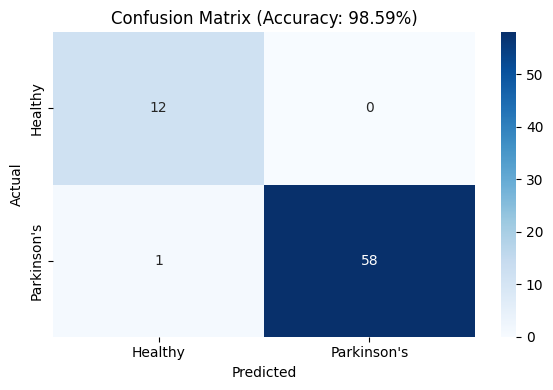

In [25]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score
import seaborn as sns
import matplotlib.pyplot as plt

# Fit the model
model = LogisticRegression(penalty='l2', solver='liblinear', C=1.0)
model.fit(X_train, y_train)

# Complete predictions on testing data
y_pred = model.predict(X_test)

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

# Print metrics
print(f"\nAccuracy:  {accuracy:.2%}")
print(f"Precision: {precision:.2%}")
print(f"Recall:    {recall:.2%}")

# Plot confusion matrix
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=["Healthy", "Parkinson's"],
            yticklabels=["Healthy", "Parkinson's"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title(f"Confusion Matrix (Accuracy: {accuracy:.2%})")
plt.tight_layout()
plt.show()


In [26]:
import pandas as pd

# Interpret most important versus least important predictors
importance = pd.DataFrame({
    'feature': X.columns,
    'coefficient': model.coef_[0]
}).sort_values(by='coefficient', key=abs, ascending=False)

print(importance)


             feature  coefficient
2   age_at_diagnosis    -2.063645
3                age     2.029557
30           link_25     1.262396
14           link_09     0.805374
13           link_08     0.784422
7            link_02     0.779878
23           link_18    -0.754898
0             female    -0.733402
24           link_19     0.725697
21           link_16     0.662331
17           link_12     0.630847
33           link_28    -0.584858
6            link_01     0.541697
20           link_15     0.503139
29           link_24     0.496563
9            link_04    -0.452275
27           link_22     0.414543
26           link_21     0.295242
18           link_13     0.265800
12           link_07     0.256627
10           link_05     0.223651
15           link_10     0.216718
22           link_17    -0.208141
28           link_23     0.190607
16           link_11     0.175152
34           link_29     0.169126
32           link_27     0.138117
35           link_30     0.130355
1   right_hand

In [28]:
con.sql(
    """
    SELECT link_id AS link_id, text
    FROM question_links
    WHERE link_id IN ('25','09','08','02','18','19')
    """
)

┌─────────┬────────────────────────────────────────────────────────────────────────┐
│ link_id │                                  text                                  │
│ varchar │                                varchar                                 │
├─────────┼────────────────────────────────────────────────────────────────────────┤
│ 02      │ Loss or change in your ability to taste or smell                       │
│ 08      │ A sense of urgency to pass urine makes you rush to the toilet          │
│ 09      │ Getting up regularly at night to pass urine                            │
│ 18      │ Feeling less interested in sex or more interested in sex               │
│ 19      │ Finding it difficult to have sex when you try                          │
│ 25      │ Talking or moving about in your sleep as if you are acting out a dream │
└─────────┴────────────────────────────────────────────────────────────────────────┘